<a href="https://colab.research.google.com/github/suy379/do_it_DL_intro/blob/main/04_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98)%2B%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. 분류하는 뉴런 만들기 (이진 분류, Classification)
- 04-1. 초기 인공지능 알고리즘 & 로지스틱 회귀란?
- 04-2. 시그모이드 함수로 확률 만들기
- 04-3. 로지스틱 손실 함수 + 경사 하강법
- 04-4. 분류용 데이터 세트 준비하기
- 04-5. 로지스틱 회귀를 위한 뉴런 만들기
- 04-6. 로지스틱 회귀 뉴런으로 단일층 신경망 만들기
- 04-7. 사이킷런으로 로지스틱 회귀 수행하기

### 04-4. 분류용 데이터 세트 준비하기(sklearn 위스콘신 유방암 데이터)
- 목표: target 값이 악성 종양(1)인지 정상 종양(0)인지를 분류하는 이진 분류.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
print(cancer.data[:3]) #피처가 30개 존재 

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


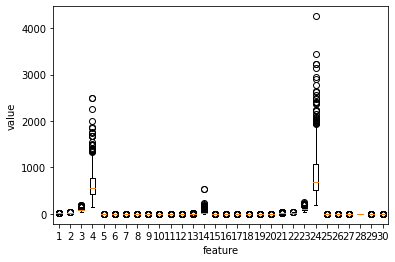

In [ ]:
#박스 플롯을 그려 각 피처의 사분위값을 나타내봄.
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

- 눈에 띄는 특성을 살펴보자. 4, 14, 24번째 특성이 다른 특성보다 값의 분포가 훨씬 크다는 것을 알 수 있다.

In [ ]:
#4, 14, 24번째 특성의 피처명은?
print(cancer.feature_names[[3, 13, 23]])

['mean area' 'area error' 'worst area']


In [ ]:
#타깃 데이터 확인하기: 0과 1의 분포가 고른가?
import numpy as np
np.unique(cancer.target, return_counts=True) #0은 212개, 1은 357개로 꽤 고른 편이다.

(array([0, 1]), array([212, 357]))

In [ ]:
#저장
x=cancer.data #이번엔 30개의 피처를 모두 사용하겠다.
y=cancer.target 

In [ ]:
print(x.shape, len(x))

(569, 30) 569


### 04-5. 로지스틱 회귀를 위한 뉴런 만들기
- 훈련 세트와 테스트 세트로 나누기(주의: 훈련셋>테스트셋이어야 하고, target의 양성-음성 클래스의 비율이 훈련셋과 테스트셋 안에서도 똑같아야 한다!)
- 로지스틱 회귀 뉴런 만들기(클래스로 구현)

In [ ]:
# 훈련셋, 테스트셋 나누기
#1. train_test_split 함수 사용
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
#2. train, test 셋이 적절히 나누어졌는지 확인하기 
print(x_train.shape, x_test.shape) #트레인셋은 455개, 테스트셋은 114개로 8:2의 비율로 잘 나눠짐.

(455, 30) (114, 30)


In [ ]:
#3. target의 클래스 비율이 비슷한지 확인하기
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
print(212/357)
print(170/285)

0.5938375350140056
0.5964912280701754


- train셋만으로 학습을 하고, test셋으로는 평가를 한다.(여기서 test셋은 validation셋의 개념)
- __로지스틱 회귀에 경사 하강법을 적용한 뉴런을 만들어보자.__(딥러닝으로 메서드를 쌓아보자!)

In [ ]:
#넘파이 배열로 사칙연산: 자동으로 배열의 요소끼리 계산
import numpy as np
a = np.array([1,2,3])
b = np.array([3,4,5])
print(a+b)
print(a*b)

[4 6 8]
[ 3  8 15]


In [ ]:
#그럼 앞서 구한 a*b의 넘파이 배열을 모두 더하려면 다음과 같이 하면 됨.
np.sum(a*b) #[3 8 15]를 모두 더한 값(3+8+15=26)

26

In [ ]:
# 행렬 곱
c = np.array([1,2,3]) #1차원
d = np.array([[1,2,3], [4,5,6]]) #2차원 
print(c.shape, d.shape)

(3,) (2, 3)


In [ ]:
#위의 상황에서 c와 d를 곱하면- 1차원은 차수가 무시되므로 2차원임.
e = d*c
print(e)
print(e.shape)

[[ 1  4  9]
 [ 4 10 18]]
(2, 3)


In [ ]:
np.sum(d*c) #그리고 이렇게 쓰면 d*c(배열)를 모두 더한 값을 출력함.(연속형 값 출력)

46

In [ ]:
#그럼 차수를 맞추지 않은 1차원도 가능? --> 된다. 왜냐하면 1차원이면 어떤 차원이든 곱할수 있기 때문(mxn의 숫자 맞출 필요없음.)
e = c*d
print(e)
print(e.shape)

[[ 1  4  9]
 [ 4 10 18]]
(2, 3)


In [ ]:
f = np.array(list(np.arange(30)))
g = np.array([50])
print(f.shape, g.shape)

(30,) (1,)


In [ ]:
print(f, g)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [50]


In [ ]:
e = f*g
print(e)
print(e.shape)

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450]
(30,)


In [ ]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None
    
    # 정방향 계산 메서드(z를 출력)
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b #x, self.w 모두 넘파이 배열이므로 각 배열 요소끼리 곱하고 모두 더해, 연속형 값인 z 반환. 
        return z

    # 정방향 메서드(a를 출력)
    def activation(self, z):
        a = 1 / (1+np.exp(-z))
        return a 

    # 역방향 계산(그레디언트를 출력)
    def backprop(self, x, err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad 

    # 핵심: 학습 메서드 --> 이 안에 forpass, activation, backprop 다있으니까 실제로 학습 시엔 fit 메서드만 사용하면 된다!! / 이 안엔 train셋(x_train, y_train)만 넣기.
    def fit(self, x, y, epochs=100):
        #초기값 설정
        self.w = np.ones(x.shape[1]) #x의 피처 개수만큼 1로 되어있는 값으로 설정 (즉, self.w의 shape은 (30,))
        self.b = 0
        #epochs만큼 반복
        for i in range(epochs):
            for xi, yi in zip(x,y):
                z = self.forpass(xi)
                a = self.activation(z) 
                err = -(yi-a)
                w_grad, b_grad = self.backprop(xi, err)
                #가중치, 절편 업데이트
                self.w -= w_grad
                self.b -= b_grad

    # 핵심: 예측 메서드-- 이 안에는 x_test만 넣고, 출력값을 y_test와 일치하는지를 보고 평가한다.
    def predict(self, x):
        z = [self.forpass(xi) for xi in x] #x가 2차원이라고 봄, fit 메서드 수행했다면 self.w와 self.b 값도 최적의 파라미터 값으로 바뀌어 있을 것임. 그러니 그냥 x를 넣어서 계산.
        a = self.activation(np.array(z)) #위에서 z는 리스트로 반환되므로, 넘파이 배열로 만들어 적용 
        return a> 0.5 #True라면 1, 아니면 0 반환 


In [ ]:
# 모델 학습하기
neuron = LogisticNeuron() #객체
neuron.fit(x_train, y_train, 1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


In [ ]:
# 학습후(반드시 학습을 먼저 진행해야함! 그래야 self.w, self.b가 최적값으로 바뀌어 있으니까!) 예측
neuron.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True])

In [ ]:
# 평가: 위의 x_test로 예측한 값을 y_test와 비교.
np.mean(neuron.predict(x_test)==y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


0.8947368421052632

- epochs 값을 늘릴수록 정확도가 커짐(epochs=100이면 0.82, 1000이면 0.89) 
- 사실 이 로지스틱 회귀 클래스는 성능이 좋은 편은 아니다. 실전에선 사이킷런과 같은 안정적인 패키지 사용을 하는 것이 좋다.

### 04-6. 로지스틱 회귀 뉴런으로 __"단일층 신경망"__ 만들기
- 새로운 기능: 손실 함수의 결과값 저장
- 확률적 경사 하강법 구현, 아까 LogisticNeuron과 다른 점은 이전에는 데이터의 순서(0번부터~455까지) 그대로 학습후 그레디언트를 빼서 업데이트했다면, 이번에는 데이터 순서를 랜덤하게 섞어서 학습후 업데이트하였다. (이게 더 학습 효율이 높다!)

In [ ]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = [] #손실 함수의 결과값 저장 - 리스트로 만들어서 추가 
    
    # 정방향 계산 메서드(z를 출력)
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b #x, self.w 모두 넘파이 배열이므로 각 배열 요소끼리 곱하고 모두 더해, 연속형 값인 z 반환. 
        return z

    # 정방향 메서드(a를 출력)
    def activation(self, z):
        a = 1 / (1+np.exp(-z))
        return a 

    # 역방향 계산(그레디언트를 출력)
    def backprop(self, x, err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad 

    # 핵심: 학습 메서드 --> 이 안에 forpass, activation, backprop 다있으니까 실제로 학습 시엔 fit 메서드만 사용하면 된다!! / 이 안엔 train셋(x_train, y_train)만 넣기.
    def fit(self, x, y, epochs=100):
        #초기값 설정
        self.w = np.ones(x.shape[1]) #x의 피처 개수만큼 1로 되어있는 값으로 설정 (즉, self.w의 shape은 (30,))
        self.b = 0
        #epochs만큼 반복
        for i in range(epochs):
            loss = 0 #loss 값 초기화 
            #index 값 섞기(여기선 x_train의 개수 455개만큼의 번호표를 랜덤하게 나열한 게 indexes임.)
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z) 
                err = -(y[i]-a)
                w_grad, b_grad = self.backprop(x[i], err)
                #가중치, 절편 업데이트
                self.w -= w_grad
                self.b -= b_grad
                #각 샘플에 대해 index마다 loss를 계산
                a = np.clip(a, 1e-10, 1-1e-10) #a값 0~1 에 가깝지 않고 1e-10~1-1e-10에 가깝도록 제한 
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) #각 샘플에 대해 총 loss 값을 더한 후
            self.losses.append(loss/len(y)) #이제 index에 대한 for문을 벗어났을 때 평균 loss 값 1개만 추가.


    # 핵심: 예측 메서드-- 이 안에는 x_test만 넣는다.
    def predict(self, x):
        z = [self.forpass(xi) for xi in x] #x가 2차원이라고 봄, fit 메서드 수행했다면 self.w와 self.b 값도 최적의 파라미터 값으로 바뀌어 있을 것임. 그러니 그냥 x를 넣어서 계산.
        return np.array(z) >0 #어차피 z가 0보다 크면 a도 0.5보다 크므로 이렇게 써도 된다.
    
    # 평가 메서드-- 이 안에는 앞서 predict로 반환된 값과 y_test를 비교한 정확도를 출력.
    def score(self, x, y):
        return np.mean(self.predict(x) == y)


In [ ]:
# 훈련 후 정확도 출력
layer = SingleLayer() #객체
layer.fit(x_train, y_train, 100) #학습

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [ ]:
#마찬가지로 predict 메서드는 쓸필요 없다. 왜냐면 score 안에 predict를 사용했으므로.
layer.score(x_test, y_test)

0.9473684210526315

- 아까 LogisticNeuron보다 성능이 확실히 좋아졌다! 오히려 epoch 수를 줄였는데도!! 
- 이것이 바로 에포크별 __인덱스 섞기__의 위력 +_+

In [ ]:
# 손실 함수 누적값 확인하기
print(layer.losses)

[7.5909398581699055, 5.920933088343447, 5.060626571358597, 5.010020305942423, 4.45335138272755, 4.099107522814011, 4.250926319244375, 4.554563913741746, 3.5930448651971703, 4.099107522450307, 3.491832333455576, 3.2388010049199276, 3.846076193369119, 3.3400135362978216, 3.2388010051017706, 2.631525816470729, 3.3400136052005744, 3.5930448648334687, 2.9351634106044058, 4.048501256124906, 3.036375941982303, 2.884557144824536, 3.6436511304314942, 3.1375884733601875, 3.6436511302496455, 2.682132082068755, 3.8460761933691243, 2.9351634102407207, 3.1881947389582175, 3.3400135361159764, 3.6436511300677985, 2.7327383474849376, 3.188194739140053, 3.289407270336101, 2.479707019312971, 3.846076193187277, 2.7833446132648003, 2.833950878862826, 2.8845571446426934, 3.542438598871759, 2.78334461308295, 3.036375941982298, 2.935163410604411, 2.8339508790446697, 3.2894072705179487, 2.9857696762024335, 2.5809195503271662, 2.4291007535330977, 2.8845571446426974, 2.3784944877532315, 2.631525816288885, 2.5303

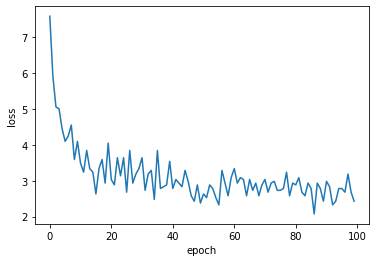

In [ ]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 04-7. 사이킷런으로 로지스틱 회귀 수행하기
- 사이킷런의 경사 하강법 구현: SGDClassifier (회귀에선 SGDRegressor)

In [ ]:
from sklearn.linear_model import SGDClassifier
#객체
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42) #max_iter = epochs, 반복할때마다 손실함수 값이 tol만큼 감소되지 않으면 반복 중단

In [ ]:
#훈련
sgd.fit(x_train, y_train)
#평가
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
#예측
sgd.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])